<a href="https://colab.research.google.com/github/kashyap333/Playground-Series-Season-3-Episode-4./blob/main/Playground_Series_Season_3%2C_Episode_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!kaggle competitions download -c playground-series-s3e4
!unzip playground-series-s3e4

 74% 62.0M/84.1M [00:00<00:00, 200MB/s]
100% 84.1M/84.1M [00:00<00:00, 205MB/s]
Archive:  playground-series-s3e4.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [ ]:
train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,...,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,109564.000000,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,...,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,63257.237906,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,...,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,...,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,54782.000000,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,...,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,109564.000000,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,...,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,164346.000000,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,...,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,219128.000000,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [ ]:
train.isna().values.any()

False

In [ ]:
train.Class.unique()

array([0, 1])

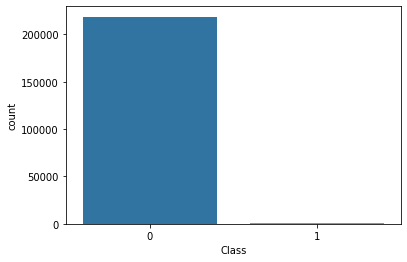

In [ ]:
sns.countplot(x='Class', data=train)

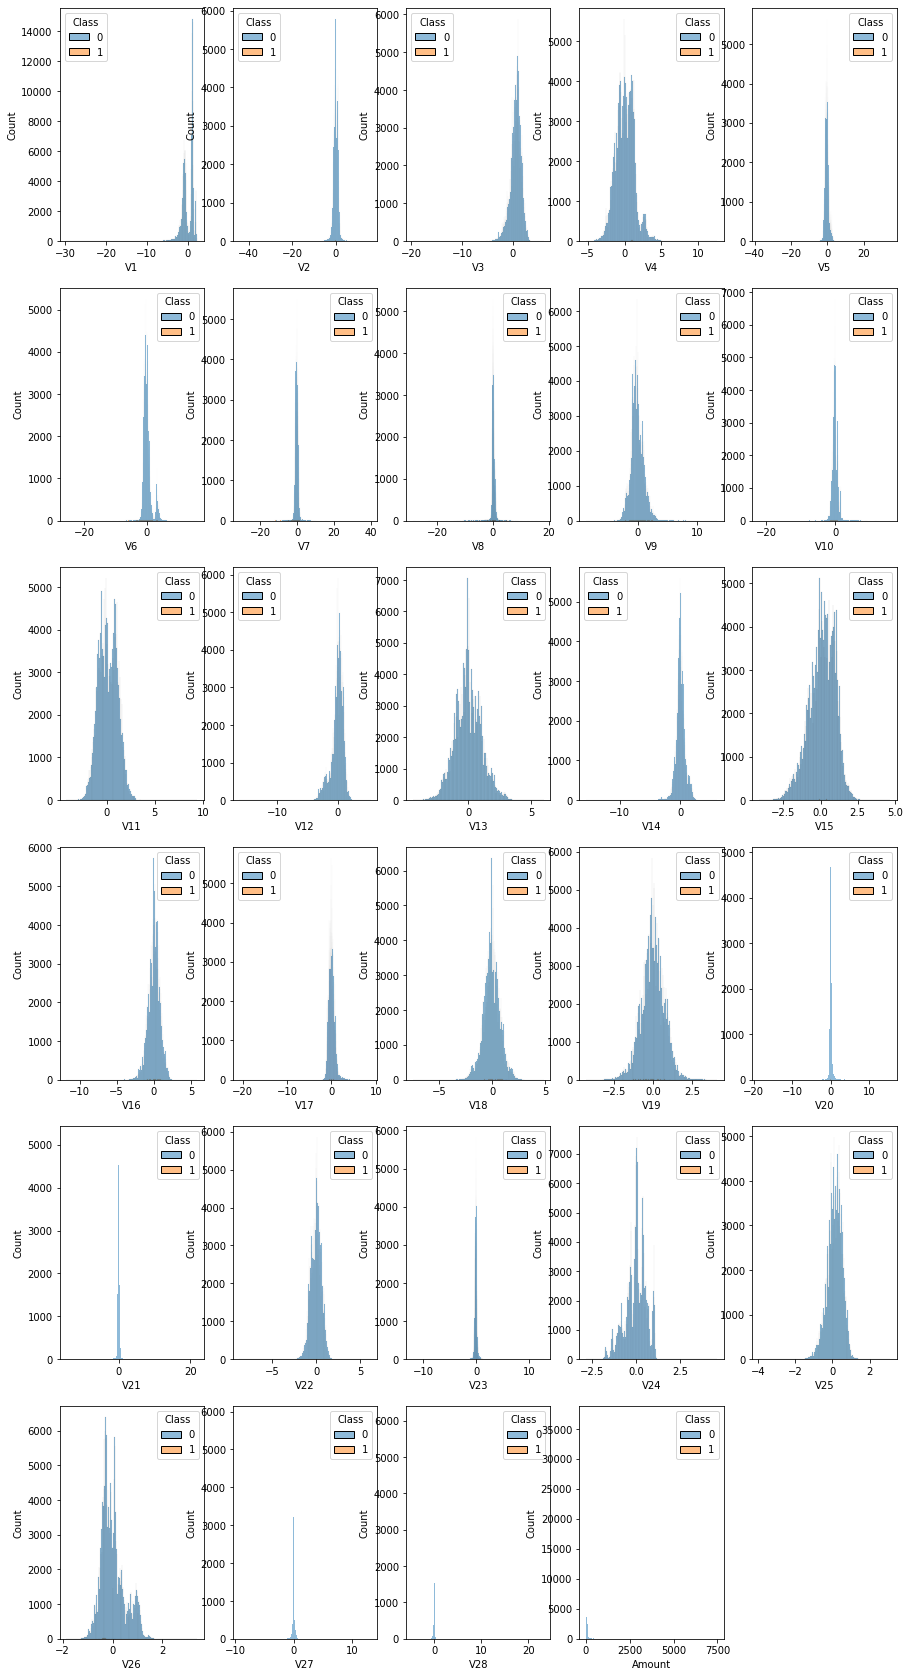

In [5]:
plt.figure(figsize=(15,30))
for i in enumerate(train.drop(['id', 'Time', 'Class'], axis=1).columns):
  plt.subplot(6, 5, i[0]+1)
  sns.histplot(data=train, x=i[1], hue='Class')

In [6]:
train.drop(['id', 'Time'], axis=1, inplace = True)
test.drop(['id', 'Time'], axis=1, inplace = True)

In [7]:
X, y = train_test_split(train, test_size=0.2, random_state=42,  stratify=train.Class)

In [ ]:
X.Class.value_counts(), y.Class.value_counts()

(0    174928
 1       375
 Name: Class, dtype: int64, 0    43732
 1       94
 Name: Class, dtype: int64)

In [13]:
SL = StandardScaler()
RS = RobustScaler()

In [ ]:
X_train = X.drop('Class', axis=1)
X_test = y.drop('Class', axis=1)
y_train = X['Class']
y_test = y['Class']

X_train[X_train.columns] = RS.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = RS.fit_transform(X_test[X_test.columns])

In [ ]:
'''sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)
sns.countplot('Class', data=pd.DataFrame(y_train))'''

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
xgb_params = {'n_estimators'     : 2000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.18,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 42,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'rmse',
             }

In [ ]:
xgbc = XGBClassifier(**xgb_params)
xgbc.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_test, y_test, cv=kfold)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [ ]:
#test.drop(['id', 'Time'], axis=1, inplace = True)
test_pred = xgbc.predict_proba(test)

In [ ]:
test = pd.read_csv('test.csv')
submission = pd.DataFrame(test['id'])
submission['Class'] = test_pred[:, 1]
submission.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c playground-series-s3e4 -f submission.csv -m '1'

100% 2.81M/2.81M [00:00<00:00, 4.75MB/s]
Successfully submitted to Playground Series Season 3, Episode 4

####LGBMC Classifier

In [8]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from lightgbm import LGBMClassifier

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
X = train.drop(['id', 'Time', 'Class'], axis=1)
y = train.Class

In [29]:
X = RS.fit_transform(X)
x_test = RS.fit_transform(test.drop(['id', 'Time'], axis=1))

In [30]:
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
def score(clf, x, y):
    return roc_auc_score(y, clf.predict_proba(x)[:,1])

In [17]:
LGBM_pred = []
LGBM_val_pred = []
scores = []

for train_i, test_i in SKF.split(X, y):

  X_train, X_test = X[train_i], X[test_i]
  y_train, y_test = y[train_i], y[test_i]

  params={'objective': 'binary',
             'metric': 'auc',
             'lambda_l1': 1.0050418664783436e-08, 
             'lambda_l2': 9.938606206413121,
             'scale_pos_weight': 1,
             'num_leaves': 44,
             'feature_fraction': 0.8247273276668773,
             'bagging_fraction': 0.5842711778104962,
             'bagging_freq': 6,
             'min_data_in_leaf': 134,
             'min_child_samples': 70,
             'max_depth': 8,
             'num_iterations': 300,
             'learning_rate':0.05}

  model = LGBMClassifier(**params)
  model.fit(X_train, y_train, eval_set = [(X_test,y_test)], early_stopping_rounds=50, verbose=500)
  LGBM_pred.append(model.predict_proba(X_test)[:,1])
  LGBM_val_pred.append(model.predict_proba(X)[:,1])
  print(str(score(model,X_train, y_train)) + "    " + str(score(model,X_test, y_test)))
  scores.append(score(model,X_test, y_test))

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[90]	valid_0's auc: 0.817024
0.9663215113265647    0.8170242930343621


/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[73]	valid_0's auc: 0.858938
0.9534995045580656    0.8589381941457739


/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[161]	valid_0's auc: 0.807206
0.9861641970791791    0.8072055420734804


/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[88]	valid_0's auc: 0.825416
0.9699688710021647    0.8254155873979034


/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 0.793872
0.9227226283737894    0.7938716906199933


In [18]:
scores

[0.8170242930343621,
 0.8589381941457739,
 0.8072055420734804,
 0.8254155873979034,
 0.7938716906199933]

In [19]:
test_pred = model.predict_proba(x_test)[:,1]
submission = pd.DataFrame(test['id'])
submission['Class'] = test_pred
submission.to_csv('submission.csv', index=False)

In [20]:
!kaggle competitions submit -c playground-series-s3e4 -f submission.csv -m '1'

100% 4.00M/4.00M [00:00<00:00, 16.4MB/s]
Successfully submitted to Playground Series Season 3, Episode 4

In [21]:
from xgboost import XGBClassifier

In [ ]:
XGB_pred = []
XGB_val_pred = []

xgb_params = {
    'n_estimators':10000,
    'max_depth':5,
    'eval_metric':'auc',
    'early_stopping_rounds': 100,    
    'random_state':55,
    'tree_method': 'gpu_hist'
}

for train_i, test_i in SKF.split(X, y):

  X_train, X_test = X[train_i], X[test_i]
  y_train, y_test = y[train_i], y[test_i]

  model = XGBClassifier(**xgb_params)
  model.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose=1000)
  XGB_pred.append(model.predict_proba(X_test)[:,1])
  XGB_val_pred.append(model.predict_proba(X)[:,1])
  print(str(score(model,X_train, y_train)) + "    " + str(score(model,X_test, y_test)))
  scores.append(score(model,X_test, y_test))

In [23]:
scores

[0.8170242930343621,
 0.8589381941457739,
 0.8072055420734804,
 0.8254155873979034,
 0.7938716906199933,
 0.640183389737492,
 0.5771695004972258,
 0.5770455589266149,
 0.640045825540867,
 0.6784595370236505]

In [24]:
test_pred = model.predict_proba(x_test)[:,1]
submission = pd.DataFrame(test['id'])
submission['Class'] = test_pred
submission.to_csv('submission.csv', index=False)

In [25]:
!kaggle competitions submit -c playground-series-s3e4 -f submission.csv -m '1'

100% 2.65M/2.65M [00:00<00:00, 10.4MB/s]
Successfully submitted to Playground Series Season 3, Episode 4